In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("titanic-passengers (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1-Apply decision tree

In [27]:
#preproocessing data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male':1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes':1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

#feature extraction
x=df.drop(["Survived","Name","Cabin","Ticket","Embarked"], axis=1) # Features
y=df["Survived"] # Target variable

#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=10)

# Create Decision Tree classifer object
model= DecisionTreeClassifier()
# Train Decision Tree Classifer
model = model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)




print("score:{}".format(accuracy_score(y_test, y_pred)))
    

score:0.7206703910614525


# 2-plot the decision tree

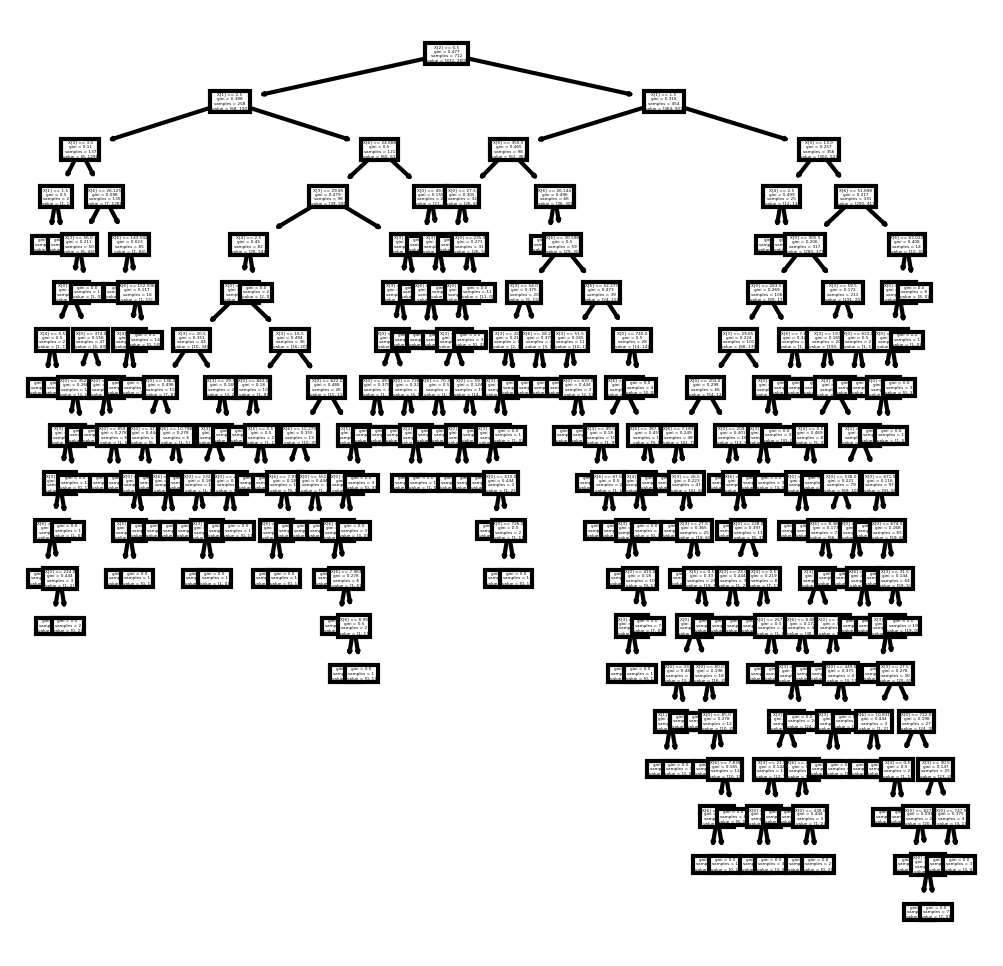

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);
fig.savefig('imagename.png')

In the decision tree  each internal node has a decision rule that splits the data. Gini referred as Gini it's a cost function which measures the purity of the node/leaf. we can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning. here it is hard to predict the resultss

# change parameters and calculate the accurcay

In [29]:
#applying tree algorithm
model=tree.DecisionTreeClassifier(criterion = "gini" , splitter= "random" ,  max_leaf_nodes = 20, min_samples_leaf = 10,
                                  max_depth =10)
model=model.fit(x_train,y_train)#fitting our model
y_pred=model.predict(x_test) #evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
    


score:0.8212290502793296


we notice whene we change the decision tree parameters accuracy changes in my case the accuracy increassed whene i lowerd the value of max_leaf_nodes and max_depth

# 5- using a random forest

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# 6-  calculating the accuracy

In [25]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8603351955307262


we notice whene we use the random forest  the accuracy increassed than it was before using the random forest
